In [651]:
from sklearn.linear_model import SGDRegressor,LinearRegression
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn .datasets import load_diabetes
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn .compose import ColumnTransformer


In [653]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\car_price_prediction_.csv")

In [655]:
data.shape

(2500, 10)

In [657]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [659]:
data.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [661]:
data.duplicated().sum()

0

In [663]:
data=data.drop(columns=["Car ID","Model"])

In [665]:
x=data.drop(columns=["Price"])
y=data["Price"]

In [667]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=52)

In [669]:
x_train

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
629,BMW,2020,4.3,Petrol,Automatic,61032,Used
2412,Audi,2000,5.1,Hybrid,Automatic,179810,New
2156,Toyota,2002,3.0,Hybrid,Manual,123323,New
1942,BMW,2019,1.8,Electric,Manual,171206,Used
285,Mercedes,2008,3.5,Hybrid,Automatic,215859,Used
...,...,...,...,...,...,...,...
503,BMW,2020,3.7,Petrol,Manual,247418,New
924,Mercedes,2004,4.8,Petrol,Automatic,178772,New
2134,Ford,2007,4.2,Hybrid,Automatic,119574,Like New
151,Mercedes,2014,4.7,Petrol,Automatic,256017,Like New


In [671]:
y_train

629     56022.56
2412    40899.14
2156    57231.50
1942    92581.20
285     10066.36
          ...   
503     58703.76
924     12414.71
2134    57430.62
151      6645.97
1692    65767.89
Name: Price, Length: 2000, dtype: float64

<Axes: ylabel='Mileage'>

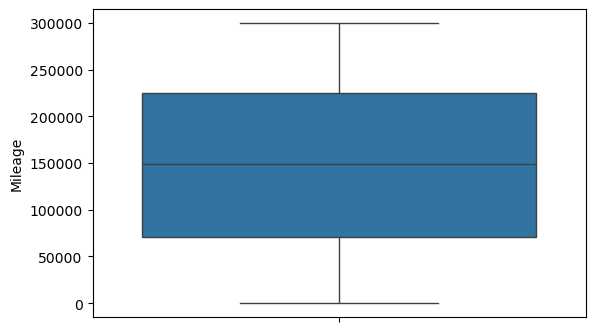

In [673]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(x_train["Mileage"])

<Axes: ylabel='Engine Size'>

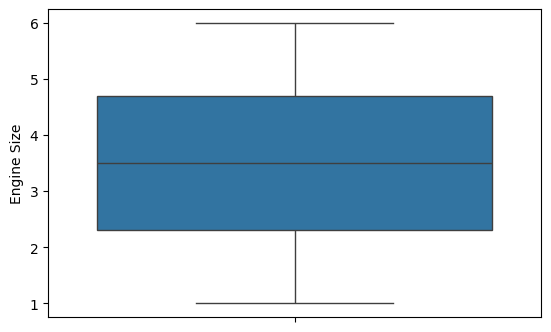

In [674]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(x_train["Engine Size"])

<Axes: ylabel='Year'>

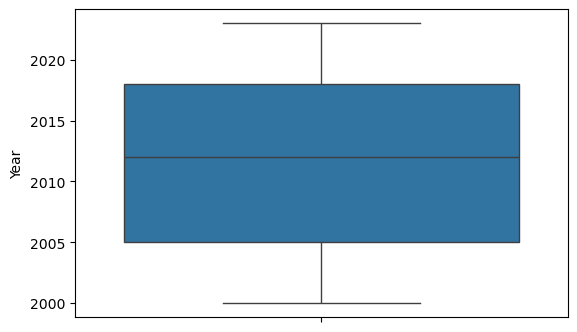

In [677]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.boxplot(x_train["Year"])

# use pipeline 

In [680]:
cat=["Brand","Fuel Type","Transmission","Condition"]
num=["Year","Engine Size","Mileage"]

In [682]:
cat_pipeline=Pipeline([
("onehotencoter",OneHotEncoder(handle_unknown="ignore",sparse_output=False))  
])

In [684]:
num_pipeline=Pipeline([

    ("scale",StandardScaler())
])

In [686]:
preprocess=ColumnTransformer([
("cat_pipeline",cat_pipeline,cat),
("num_pipeline",num_pipeline,num)
])

In [688]:
pip=Pipeline([
("preprocess",preprocess),
("model",LinearRegression())

    
])

In [690]:
pip.fit(x_train,y_train)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_pipeline', ...), ('num_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [692]:
pred=pip.predict(x_test)

In [694]:
score=r2_score(y_test,pred)

In [696]:
score

0.0018740942905833835

In [698]:
x_test

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition
2125,Toyota,2004,5.6,Hybrid,Automatic,252365,New
856,Honda,2016,6.0,Diesel,Manual,290604,New
760,Audi,2021,5.2,Diesel,Automatic,218403,New
1242,Audi,2002,2.4,Diesel,Manual,273302,New
2028,BMW,2016,5.2,Electric,Automatic,86623,Like New
...,...,...,...,...,...,...,...
1737,Ford,2014,3.7,Electric,Manual,17769,New
2029,Tesla,2014,2.3,Diesel,Automatic,225097,New
2372,Ford,2007,3.3,Electric,Manual,117486,New
2443,Ford,2014,5.6,Electric,Manual,120926,Used


In [700]:
mse=mean_squared_error(y_test,pred)

In [702]:
mse

706649575.7595682